In [8]:
using JuMP, Ipopt, Plots

In [9]:
dynopt_cstr = Model(solver=IpoptSolver());

In [10]:
np       = 1:101  
caf      = 1
v        = 5000
k        = 2
t0       = 0
tf       = 30
qinit    = 10
cainit   = 0.0967
qtarget  = 100
catarget = 0.2;


In [11]:
time  = Array{Float64}(undef, length(np))
w     = Array{Float64}(undef, length(np))
dt    = (tf-t0)/(length(np)-1)
for i = 1:length(np)
   time[i] = t0+(i-1)*dt
end
w[1] = 1
w[length(np)] = 1;
for i = 2:length(np)-1
    w[i] = 2
    if mod(i,2) == 0
       w[i] = 4
    end
end

In [12]:
@variable(dynopt_cstr, 0 <= ca[np] <= caf,  start = 0.5*caf );
@variable(dynopt_cstr,      q[np]  >= 0  ,  start = qinit   );

In [13]:
@NLconstraint(dynopt_cstr, endca[i in 2:length(np)], ca[i] ==  ca[i-1] + dt*(q[i]*(caf-ca[i])/v -k*ca[i]^3  ));

In [14]:
@constraint(dynopt_cstr, icond_ca, ca[1] == cainit);

In [15]:
@constraint(dynopt_cstr, icond_q,  q[1] == qinit);

In [16]:
@NLobjective(dynopt_cstr, Min, (dt/3)*sum(w[i]*( (ca[i]-catarget)^2 + (q[i]-qtarget)^2   ) for i in np   )  );

In [17]:
status_dynopt_cstr = solve(dynopt_cstr);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      302
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      502

Total number of variables............................:      202
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      101
                     variables with only upper bounds:        0
Total number of equ

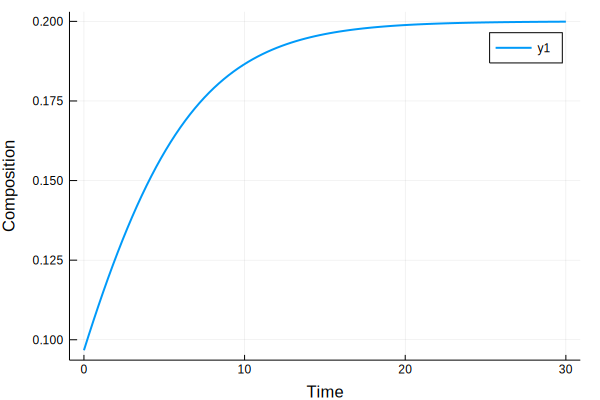

In [18]:
mytime   = Array{Float64}(undef, length(np))                
cap      = Array{Float64}(undef, length(np))                
qp       = Array{Float64}(undef, length(np))                

for i = 1:length(np)
    mytime[i] = time[i]
    cap[i]  = getvalue(ca[i])   
    qp[i]   = getvalue(q[i])
end    

plot(mytime,cap,lw=2,xlabel="Time",ylabel="Composition")

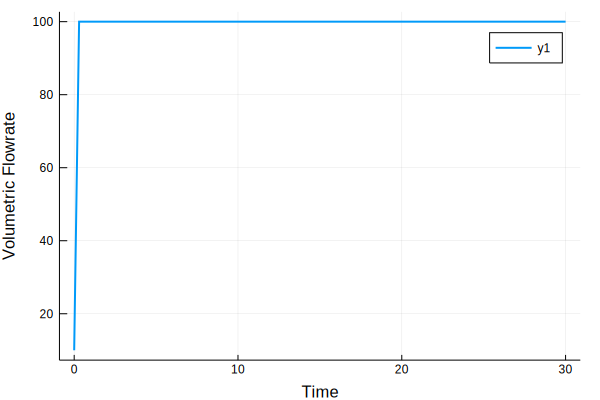

In [19]:
plot(mytime,qp,lw=2,xlabel="Time",ylabel="Volumetric Flowrate")